In [3]:
import sys, os
os.chdir('/home/koritskiy/rqc/ferrimagnet/')
from modules.energy import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from matplotlib.pyplot import figure
from scipy import optimize

from ipywidgets import interactive
from IPython.display import clear_output

In [2]:
def multiple_gd(func, fprime, args, n_it):
    "This code is a garbage, but it works"
    smallest_energy = 10^100
    best_thetas = []
    X0 = np.linspace(-np.pi, np.pi, n_it)
    for x0 in X0:
        theta = optimize.fmin_cg(energy,
                            x0,
                            fprime=fprime,
                            args=args,
                            disp=False)[0]
        x, h = args
        if energy(theta, x, h) < smallest_energy and theta not in best_thetas:
            smallest_energy = energy(theta, x, h)
            best_thetas.append(theta)
    return min(best_thetas)

70
/
71


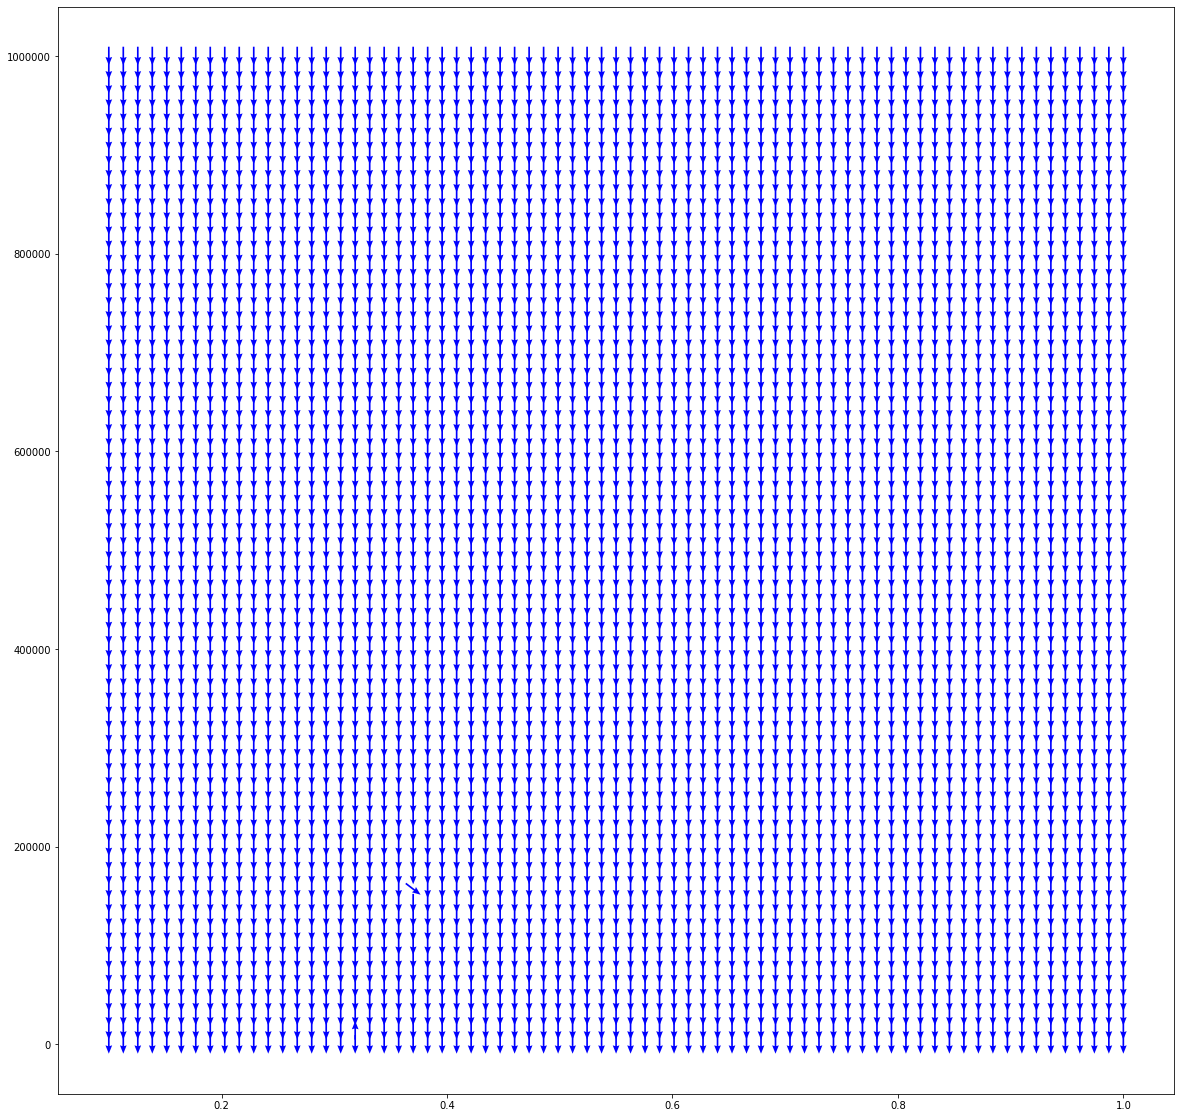

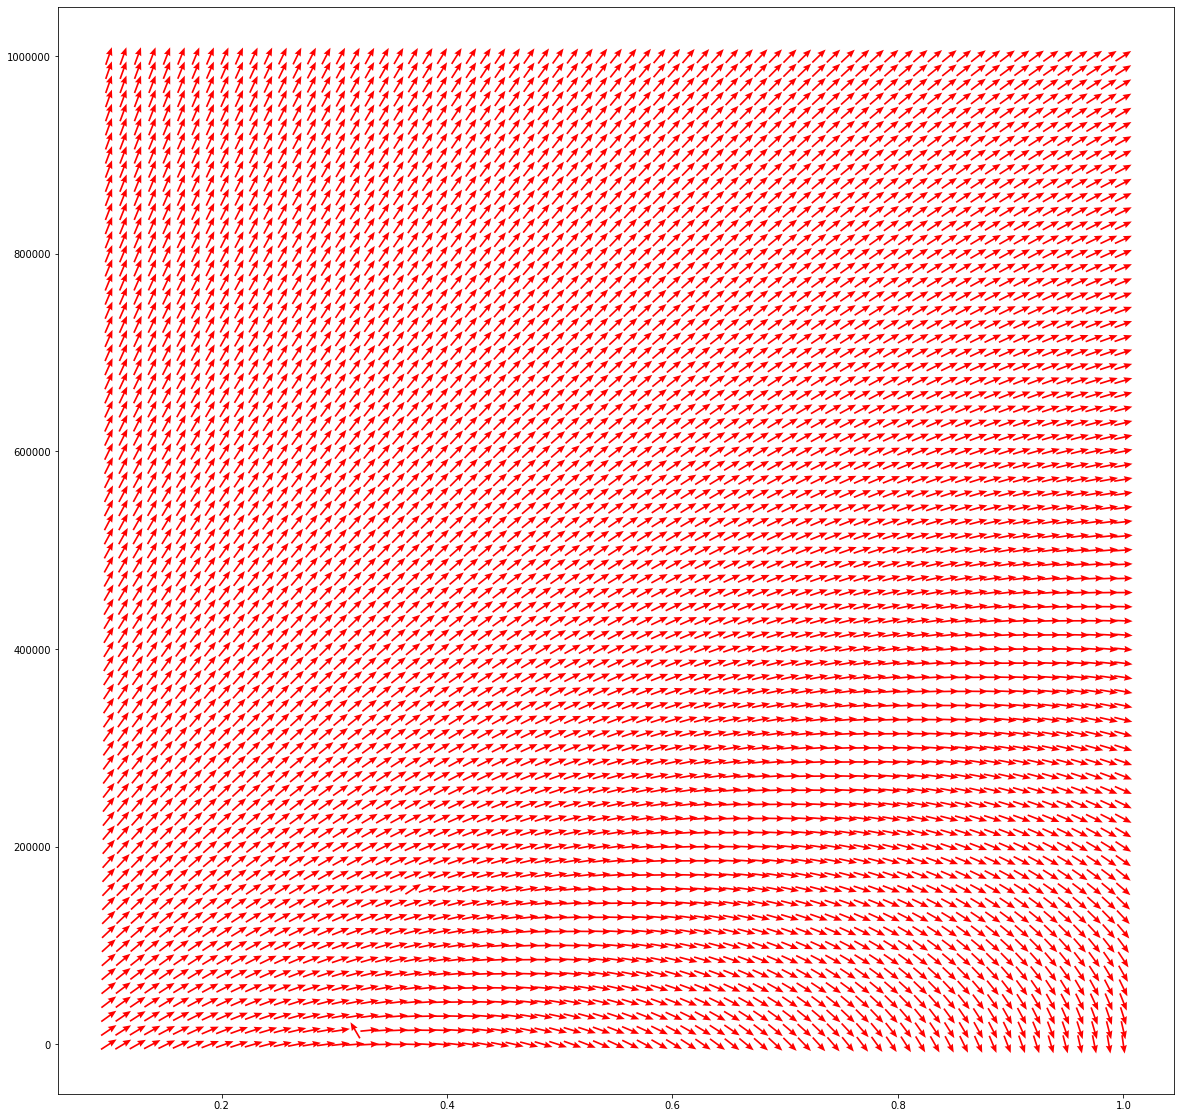

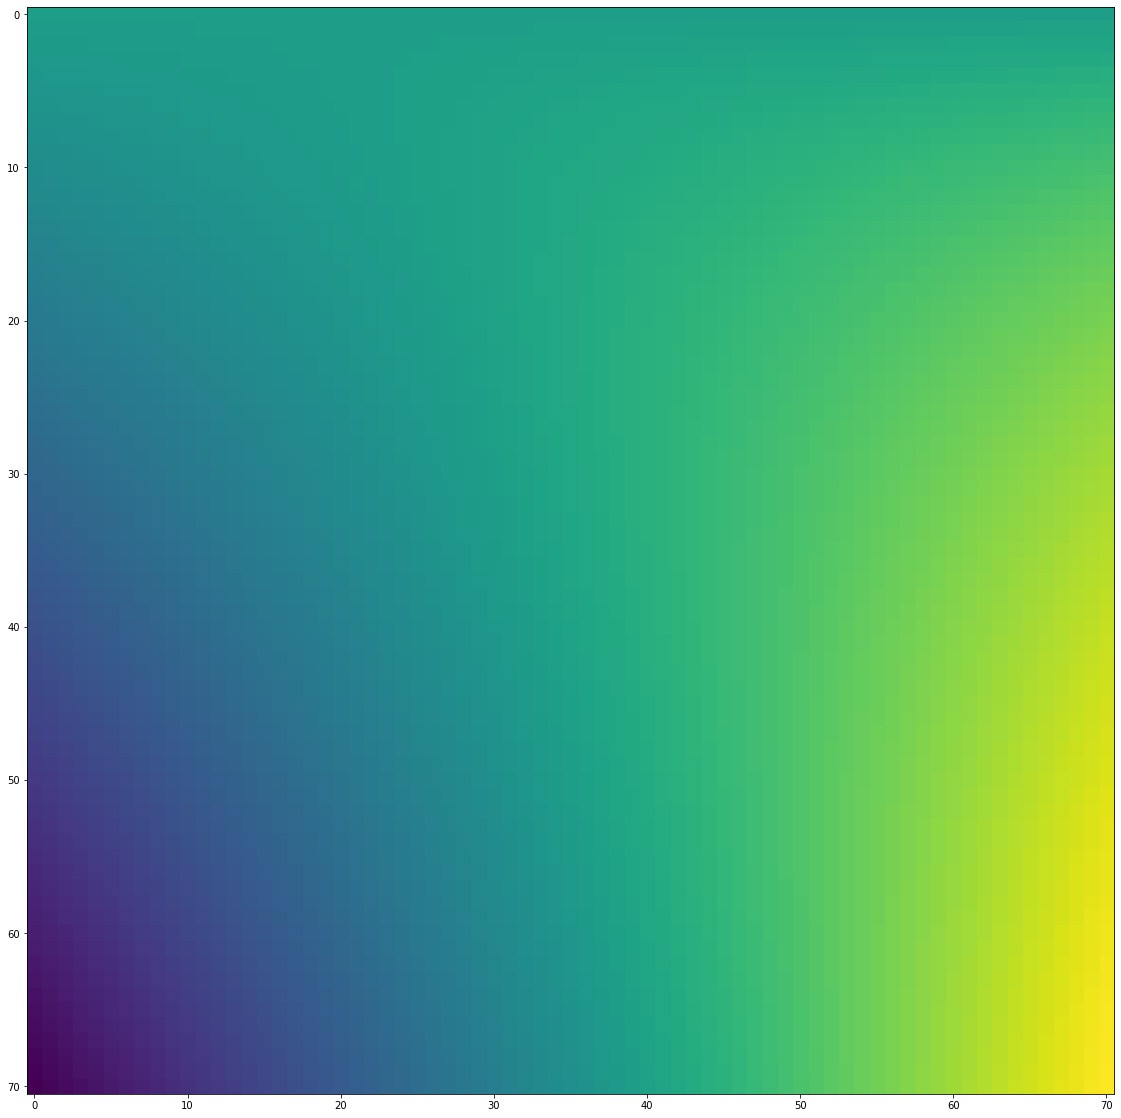

In [4]:
# Generate coordinate grid
N = 71
X = np.linspace(0.1, 1, N)
H = np.linspace(1, 10 ** 6, N)
XX, HH = np.meshgrid(X, H)
thetas = np.zeros((N, N))
thetas_f = np.zeros((N, N))
dd = np.zeros((N, N))
# x and y numerates grid points, not coordinates
i = 0
for x_i in range(N):
    for h_i in range(N):
        args = XX[x_i, h_i], HH[x_i, h_i]
        theta= multiple_gd(energy, denergy, args, 10)
#         theta = optimize.fmin_cg(energy,
#                             x0=np.random.rand()*2*np.pi,
#                             fprime=denergy,
#                             args=args,
#                             disp=False)[0]
        thetas[x_i, h_i] = theta
        x, h = args
        thetas_f[x_i, h_i] = (H[h_i] - l * Md * np.cos(theta))/Heff(theta, h)
        dd[x_i, h_i] = ddenergy(theta, x, h)
    clear_output(wait=True)
    print(i)
    print("/")
    print(N)
    i+=1
# Determine x and y projections of spins (H points  at "y" direction)
Md_h = np.cos(thetas)
Md_x = np.sin(thetas)

Mf_h = np.cos(thetas_f)
Mf_x = np.sin(thetas_f)



# fig, ax = plt.subplots()
plt.figure(figsize=(20,20))
plt.quiver(XX, HH, Md_x, Md_h, pivot='mid', scale=60, color='blue', width=0.0015, headwidth=4, label='Md')
plt.figure(figsize=(20, 20))
plt.quiver(XX, HH, Mf_x, Mf_h, pivot='mid', scale=60, color='red', width=0.0015, headwidth=4, label='Mf')
plt.figure(figsize=(20,20))
plt.imshow(dd, cmap='viridis')